# Projet 4 - Groupe 4 

In [1]:
import pandas as pd
dataset = pd.read_csv("dataset/train.csv")
dataset.head(5)

name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask

In [2]:
print(dataset["classname"].value_counts())

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64


In [9]:
dataset = dataset[dataset["classname"].isin(["face_with_mask",
                                    "face_no_mask"])]
dataset.head(5)

name   x1   x2   y1   y2       classname
0   2756.png   69  126  294  392  face_with_mask
1   2756.png  505   10  723  283  face_with_mask
4   6098.jpg  360   85  728  653    face_no_mask
7   4591.png  239    9  522  342  face_with_mask
11  5525.jpg  262   18  484  319    face_no_mask

### Répartition des classes Mask / No mask

In [4]:
dataset["classname"].value_counts()

face_with_mask    4180
face_no_mask      1569
Name: classname, dtype: int64

In [11]:
im_num = "4591"
df_loc_im = dataset[dataset["name"]=="4591.png"].iloc[0]
#df_loc_im = dataset[dataset["name"]=="2756.png"].iloc[1]
df_loc_im

name               4591.png
x1                      239
x2                        9
y1                      522
y2                      342
classname    face_with_mask
Name: 7, dtype: object

In [12]:
from PIL import Image
import matplotlib

x1 = df_loc_im["x1"]
x2 = df_loc_im["x2"]
y1 = df_loc_im["y1"]
y2 = df_loc_im["y2"]


im = Image.open(f"dataset/Medical mask/images/{im_num}.png")
im_crop = im.crop((x1,x2,y1,y2))

Image size :(283, 333)


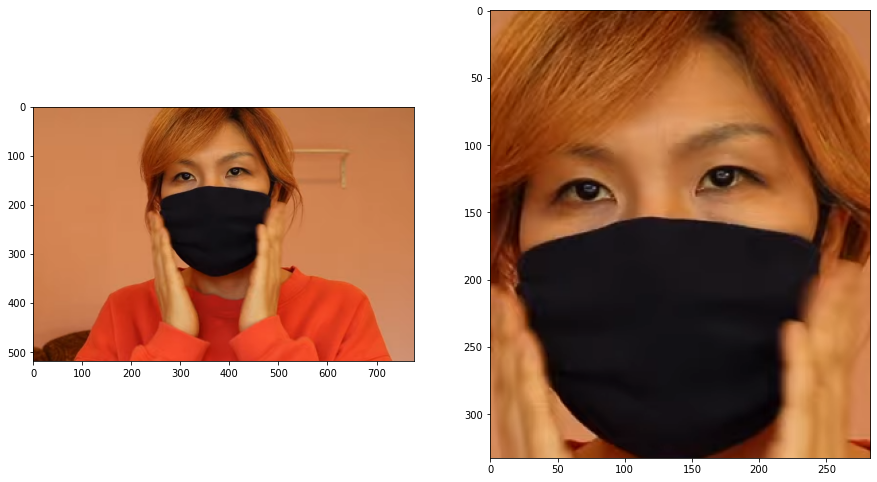

In [13]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.imshow(im)
ax2.imshow(im_crop)
print(f"Image size :{im_crop.size}")

(50, 50)


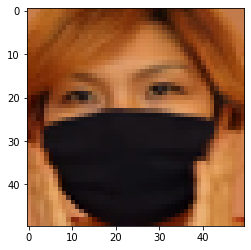

In [14]:
im_crop = im_crop.resize((50,50))

plt.imshow(im_crop)
print(im_crop.size)

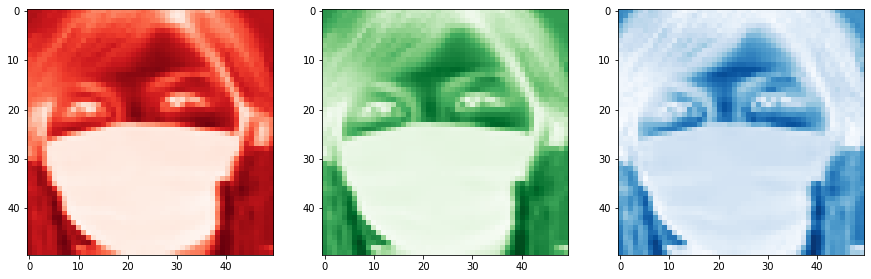

In [15]:
im_r,im_g,im_b = im_crop.split()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
ax1.imshow(im_r,cmap="Reds")
ax2.imshow(im_g,cmap="Greens")
ax3.imshow(im_b,cmap="Blues")

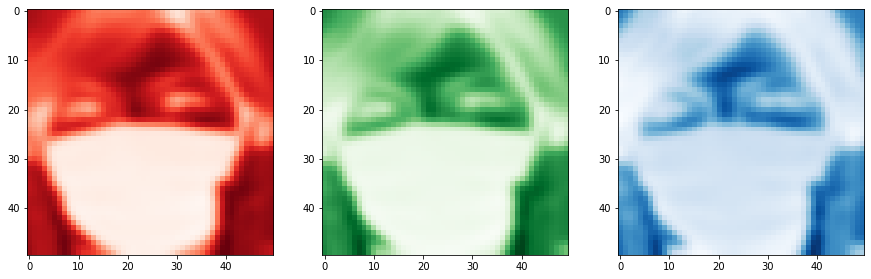

In [16]:
import numpy as np
import skimage.io
import skimage.color
import skimage.filters

im_r_arr = np.asarray(im_r)
im_g_arr = np.asarray(im_g)
im_b_arr = np.asarray(im_b)

blurred_image_r = skimage.filters.gaussian(im_r_arr, sigma=1.0)
blurred_image_g = skimage.filters.gaussian(im_g_arr, sigma=1.0)
blurred_image_b = skimage.filters.gaussian(im_b_arr, sigma=1.0)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
ax1.imshow(blurred_image_r,cmap="Reds")
ax2.imshow(blurred_image_g,cmap="Greens")
ax3.imshow(blurred_image_b,cmap="Blues")

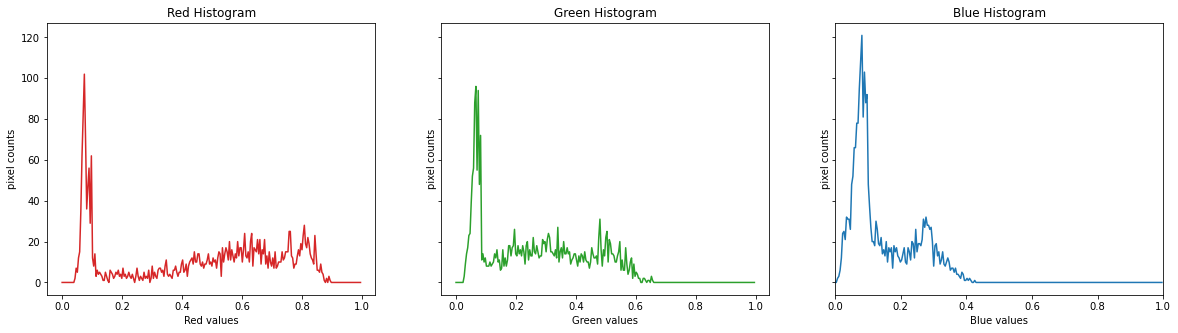

In [17]:
import skimage.io
import skimage.color
import skimage.filters


histogram_r, bin_edges_r = np.histogram(blurred_image_r, bins=256, range=(0,1))
histogram_g, bin_edges_g = np.histogram(blurred_image_g, bins=256, range=(0,1))
histogram_b, bin_edges_b = np.histogram(blurred_image_b, bins=256, range=(0,1))

fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,sharex=False,figsize=(20,5))

ax1.set_title("Red Histogram")
ax1.set(xlabel='Red values', ylabel='pixel counts')
ax1.plot(bin_edges_r[0:-1], histogram_r,'tab:red')

ax2.set_title("Green Histogram")
ax2.set(xlabel='Green values', ylabel='pixel counts')
ax2.plot(bin_edges_g[0:-1], histogram_g,'tab:green')

ax3.set_title("Blue Histogram")
ax3.set(xlabel='Blue values', ylabel='pixel counts')
ax3.plot(bin_edges_b[0:-1], histogram_b,'tab:blue')


plt.xlim(0,1)

plt.show()


In [18]:
red_tresh_offset = 0
max_bin_index = np.argmax(histogram_r)
if max_bin_index < 248:
    red_tresh_offset = 9    
max_red_pxcount = bin_edges_r[max_bin_index+red_tresh_offset]
print(f'Max red_value: {max_red_pxcount}')

green_tresh_offset = 0
max_bin_index = np.argmax(histogram_g)
if max_bin_index < 248:
    green_tresh_offset = 9   
max_green_pxcount = bin_edges_g[max_bin_index+green_tresh_offset]
print(f'Max green_value: {max_green_pxcount}')

blue_tresh_offset = 0
max_bin_index = np.argmax(histogram_b)
if max_bin_index < 248:
    blue_tresh_offset = 9
max_blue_pxcount = bin_edges_b[max_bin_index+blue_tresh_offset]
print(f'Max blue_value: {max_blue_pxcount}')

Max red_value: 0.109375
Max green_value: 0.1015625
Max blue_value: 0.1171875


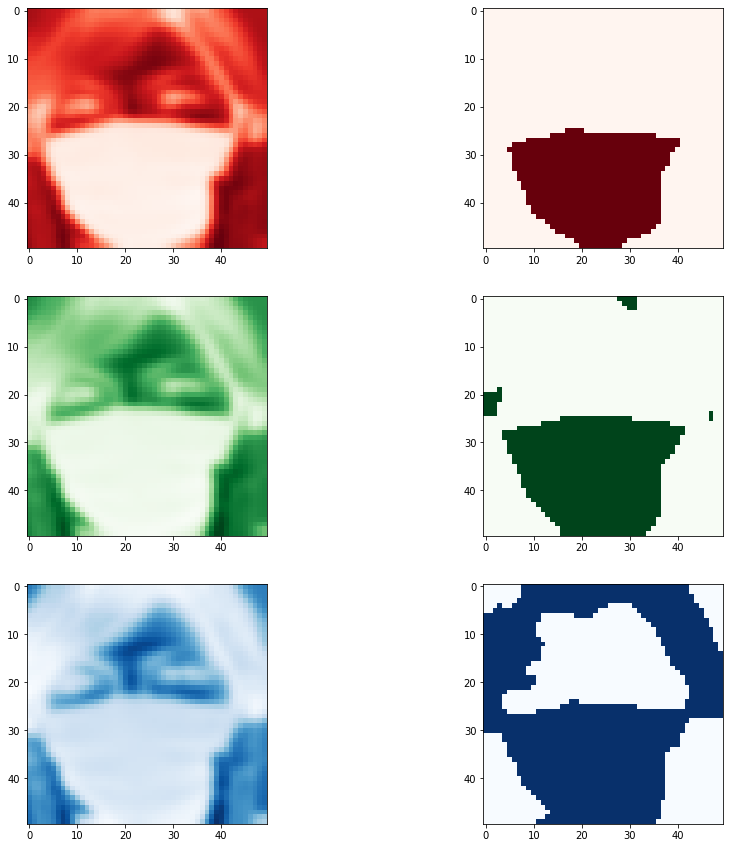

In [19]:
red_treshold = max_red_pxcount
green_treshold = max_green_pxcount
blue_treshold = max_blue_pxcount

binary_mask_r = blurred_image_r < red_treshold
binary_mask_g = blurred_image_g < green_treshold
binary_mask_b = blurred_image_b < blue_treshold

fig, ((ax1, ax2),(ax3 ,ax4), (ax5 ,ax6)) = plt.subplots(3, 2,figsize=(15,15))
ax1.imshow(blurred_image_r, cmap='Reds')
ax2.imshow(binary_mask_r, cmap='Reds')

ax3.imshow(blurred_image_g, cmap='Greens')
ax4.imshow(binary_mask_g, cmap='Greens')

ax5.imshow(blurred_image_b, cmap='Blues')
ax6.imshow(binary_mask_b, cmap='Blues')

In [20]:
binary_mask_g

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
px_0_r = (binary_mask_r == False).sum()
px_1_r = (binary_mask_r == True).sum()
px_rate_r = px_1_r/px_0_r
print(f'px_rate_r: {px_rate_r}')

px_0_g = (binary_mask_g == False).sum()
px_1_g = (binary_mask_g == True).sum()
px_rate_g = px_1_g/px_0_g
print(f'px_rate_g: {px_rate_g}')

px_0_b = (binary_mask_b == False).sum()
px_1_b = (binary_mask_b == True).sum()
px_rate_b = px_1_b/px_0_b
print(f'px_rate_b: {px_rate_b}')

px_rate_r: 0.3462574044157243
px_rate_g: 0.41803743618831535
px_rate_b: 1.3169601482854494
